In [1]:
import torchvision
import torch

ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn

In [ ]:
ssd_model.to('cuda')
ssd_model.eval()

In [ ]:
uris = ["water_bottle.jpg"]
inputs = inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [5]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [6]:
print(detections_batch)

(tensor([[[ 0.9422,  1.0553, -0.6103,  ..., -0.1380, -0.0949, -0.2418],
         [ 0.2506,  0.7469,  0.9240,  ...,  0.3278,  0.2987,  0.0981],
         [-1.3012,  0.8546,  1.5225,  ..., -0.6964, -0.3895, -0.5302],
         [-1.9538, -1.8478, -1.7798,  ..., -0.3325,  1.4396, -0.4197]]],
       device='cuda:0'), tensor([[[ 8.2249,  8.5389,  8.5488,  ...,  6.6946,  6.6174,  6.4803],
         [ 0.5739, -0.2610, -0.4625,  ...,  1.2110,  1.5337,  1.5700],
         [-0.6961, -0.8289, -0.6610,  ...,  0.1656,  0.1386,  0.1396],
         ...,
         [-0.9442, -1.4695, -1.5091,  ...,  0.0325, -0.1443,  0.1137],
         [-0.4505, -0.1798, -0.0180,  ..., -1.0012, -0.9857, -0.9778],
         [ 0.6250,  1.2496,  1.3763,  ..., -0.0997, -0.1804,  0.1425]]],
       device='cuda:0'))


In [21]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

In [14]:
classes_to_labels = utils.get_coco_object_dictionary()

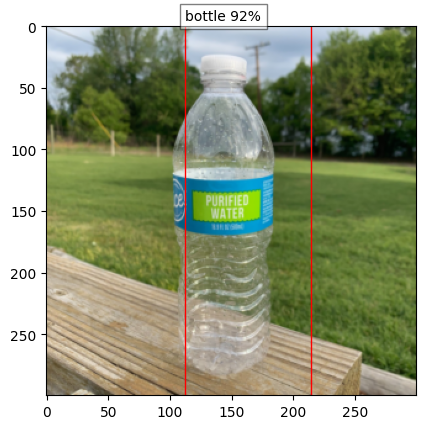

In [22]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()
